In [1]:
import xport

In [2]:
import pandas as pd

# Merges columns in a singular csv file by ID number for yes or no questions - SEQN is the ID number for a person on NHANES

In [4]:
def create_df (file, columns,names):
    with open(file, 'rb') as f:
        df = xport.to_dataframe(f)
    df1=df['SEQN']
    df1=df1.to_frame()
    i=0
    for column in columns:
        df1=pd.merge(df1,df[(df[column]==2.0) | (df[column]==1.0)][['SEQN',column]],how='inner',on='SEQN')
        df1.replace({2.0:0 , 1.0:1}, inplace = True)
        df1.rename(columns={column: names[i]}, inplace = True)
        i+=1
    return df1


# Merges columns in a singular cvs file for non yes or no questions

In [5]:
def create_df2 (file, columns,names):
    with open(file, 'rb') as f:
        df = xport.to_dataframe(f)
    df1=df['SEQN']
    df1=df1.to_frame()
    i=0
    for column in columns:
        df1=pd.merge(df1,df[['SEQN',column]],how='inner',on='SEQN')
        df1.rename(columns={column: names[i]}, inplace = True)
        i+=1
    return df1

# Medical History - MCQ_H.XPT

In [6]:
x = ['MCQ220','MCQ010','MCQ160A','MCQ050','MCQ053','MCQ070','MCQ080','MCQ082','MCQ160N','MCQ160B','MCQ160C',
    'MCQ160D','MCQ160E','MCQ160F','MCQ160G','MCQ160O','MCQ203']
y = ['cancer','asthma','arthritis','emergency_care_asthma_pastyr','treatment_asthma_past_3months','psoriasis',
     'ever_overweight','ever_told_celiac','ever_told_had_a_gout','ever_told_congestive_heart_failure',
    'ever_told_coronary_heart_disease','ever_told_angina_angina/pectoris','ever_told_heart_attack',
     'ever_told_have_stroke','ever_told_emphysema','ever_told_copd','ever_told_jaundice']
answers1=create_df ('MCQ_H.XPT', x,y)



In [7]:
x = ['MCQ025','MCQ180A','MCQ180B','MCQ180N','MCQ180C','MCQ180D','MCQ180E','MCQ075','MCQ180F','MCQ180G','MCQ206']
y = ['age_diagnosed_asthma','age_diagnosed_arthritis','age_when_told_heart_failure',
    'age_when_had_gout','age_when_coronary_heart_disease','age_when_told_angina_angina/pectorias',
    'age_when_had_heart_attack','degree_of_psoriasis','age_when_had_stroke','age_when_told_emphysemia',
    'age_when_jaundice']
answersmany=create_df2 ('MCQ_H.XPT', x,y)


In [8]:
df1m=pd.merge(answers1,answersmany,how='inner',on='SEQN')

# EDA

In [10]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
def make_bar_graph (thing):
    
    objects = (f'have {thing} and cancer', f'do not have {thing} and have cancer')
    y_pos = np.arange(len(objects))
    performance = [len(answers1[(answers1[f'{thing}']==1) & (answers1['cancer']==1)][[f'{thing}','cancer']])]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)

    plt.show()

In [ ]:
len(answers1[(answers1['arthritis']==1) & (answers1['cancer']==1)][['arthritis','cancer']])

In [ ]:
len(list(answers1[(answers1['cancer']==1)]['cancer']))

In [ ]:
len(list(answers1[(answers1['cancer']==0)]['cancer']))

In [ ]:
answers3['ever_overweight']

In [ ]:
objects = (f'Yes Cancer \n Yes Overweight', f'Yes Cancer \n No Overweight')
y_pos = np.arange(len(objects))
performance = [len(answers3[(answers3['ever_overweight']==1) & (answers3['cancer']==1)][['ever_overweight','cancer']]),
              len(answers3[(answers3['ever_overweight']==0) & (answers3['cancer']==1)][['ever_overweight','cancer']]),]

plt.bar(y_pos, performance, align='center', alpha=0.5, color= 'b')
plt.xticks(y_pos, objects)
plt.ylabel('people (#)')
plt.show()

In [ ]:
objects = (f'No Cancer \n Yes Overweight', f'No Cancer \n No Overweight')
y_pos = np.arange(len(objects))
performance = [len(answers3[(answers3['ever_overweight']==1) & (answers3['cancer']==0)][['ever_overweight','cancer']]),
              len(answers3[(answers3['ever_overweight']==0) & (answers3['cancer']==0)][['ever_overweight','cancer']]),]

plt.bar(y_pos, performance, align='center', alpha=0.5, color= 'b')
plt.xticks(y_pos, objects)
plt.ylabel('people (#)')
plt.show()

In [ ]:
import scipy.stats
from scipy.stats import linregress

In [ ]:
scipy.stats.pearsonr(answers1['arthritis'], answers1['cancer'])

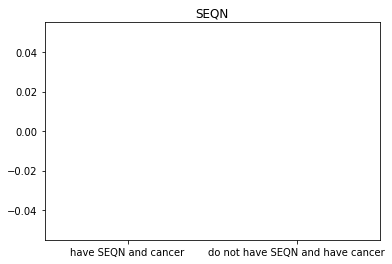

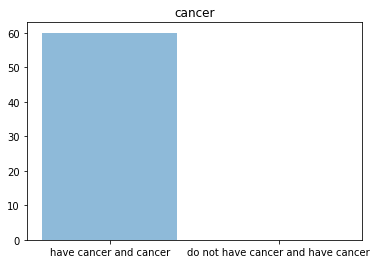

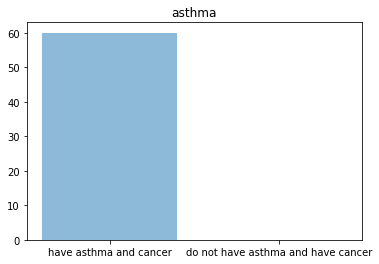

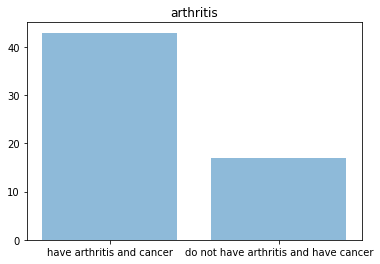

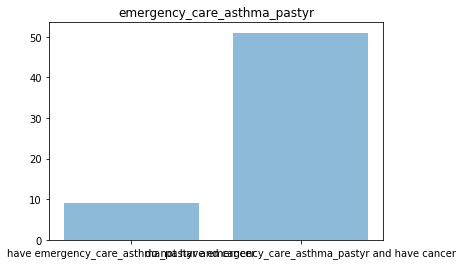

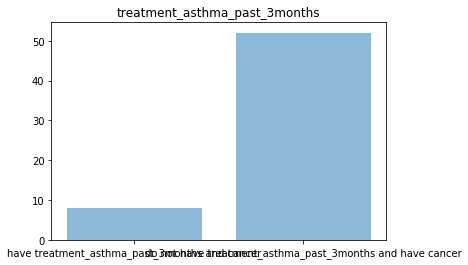

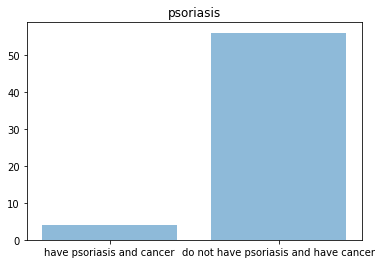

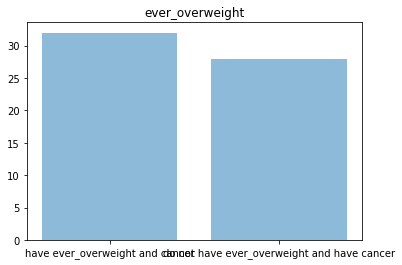

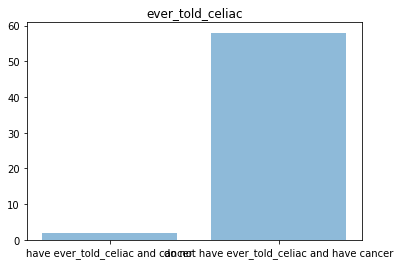

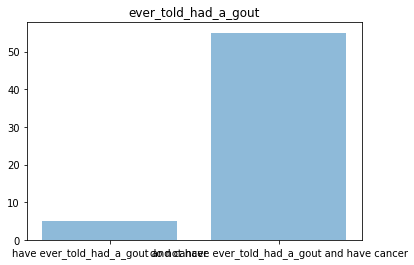

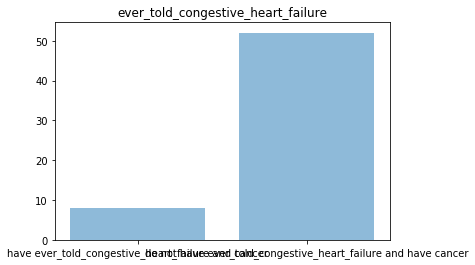

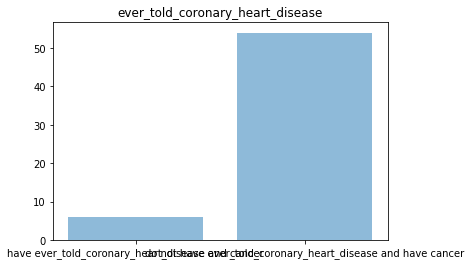

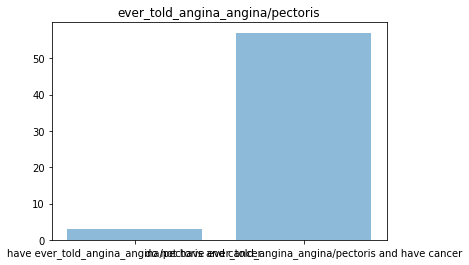

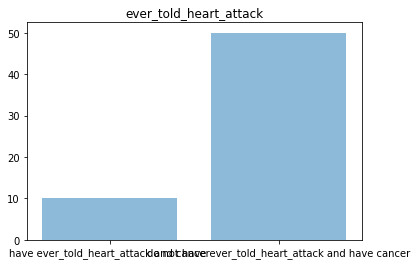

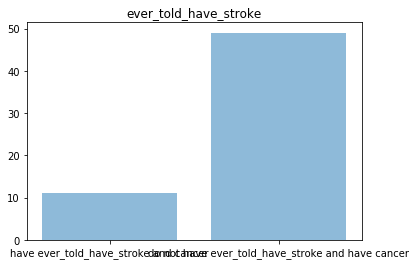

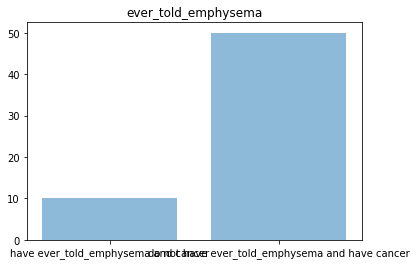

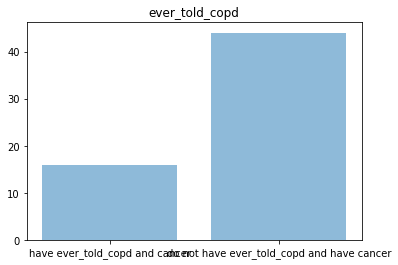

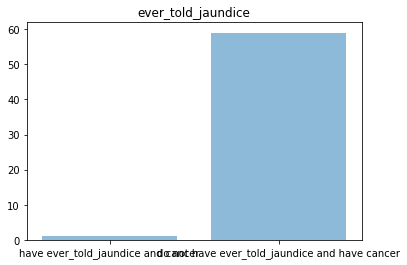

In [11]:
for thing in answers1.columns:
    objects = (f'have {thing} and cancer', f'do not have {thing} and have cancer')
    y_pos = np.arange(len(objects))
    performance = [len(answers1[(answers1[f'{thing}']==1) & (answers1['cancer']==1)][[f'{thing}','cancer']]),
                   len(answers1[(answers1[f'{thing}']==0) & (answers1['cancer']==1)][[f'{thing}','cancer']])]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.title(f'{thing}')
    plt.show()
    
    

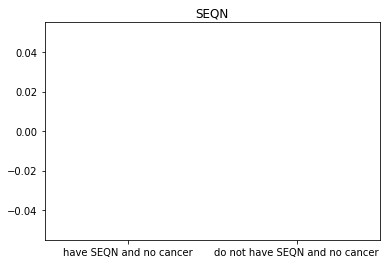

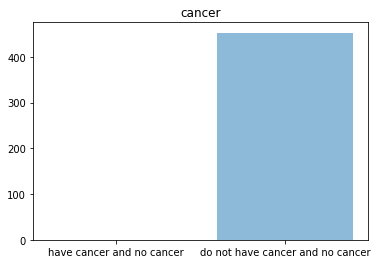

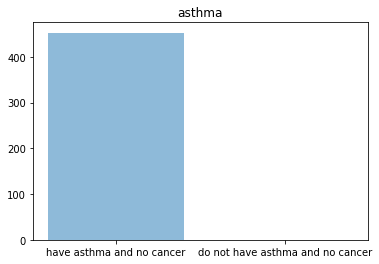

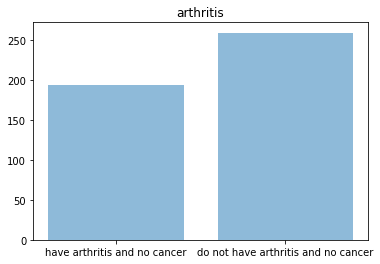

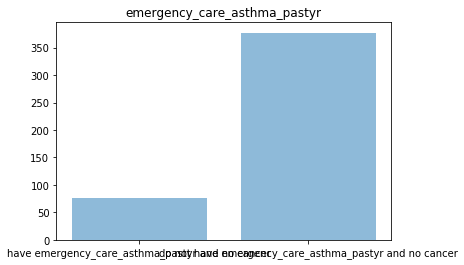

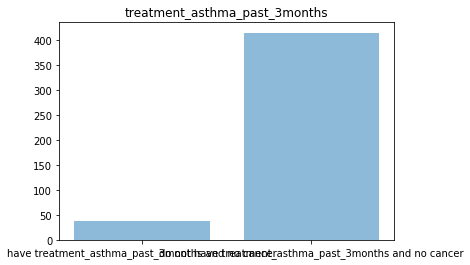

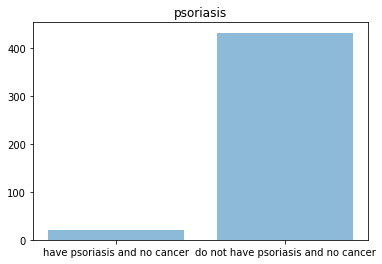

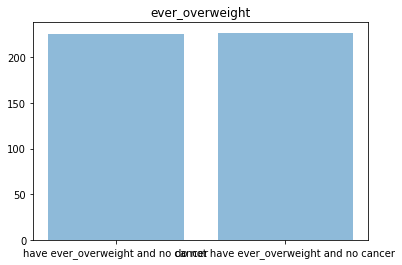

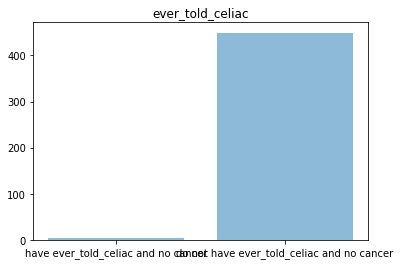

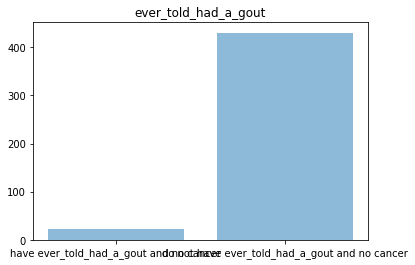

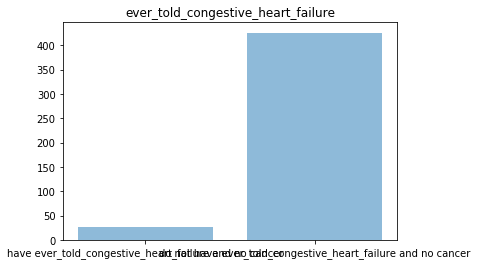

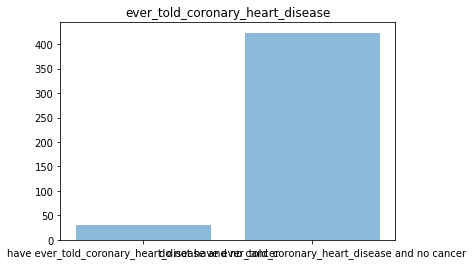

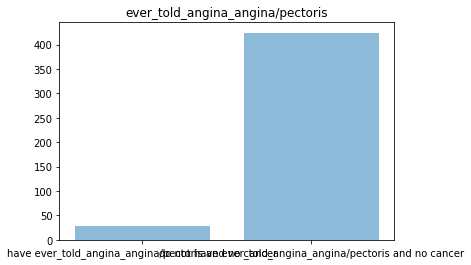

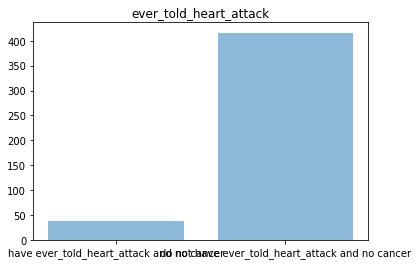

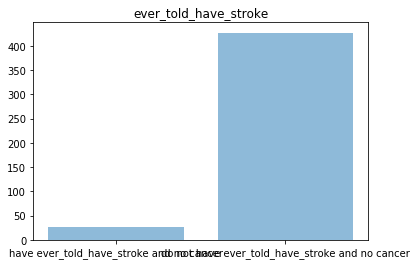

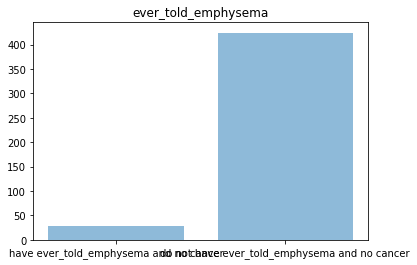

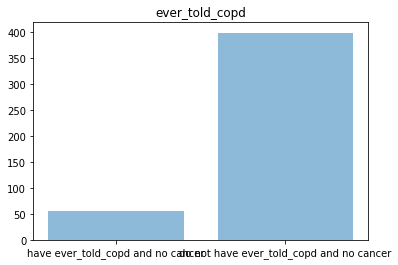

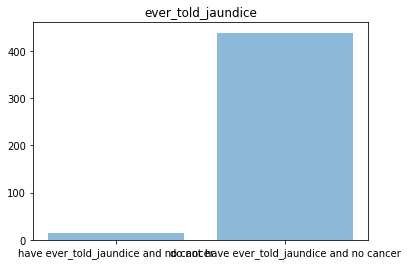

In [12]:
for thing in answers1.columns:
    objects = (f'have {thing} and no cancer', f'do not have {thing} and no cancer')
    y_pos = np.arange(len(objects))
    performance = [len(answers1[(answers1[f'{thing}']==1) & (answers1['cancer']==0)][[f'{thing}','cancer']]),
                   len(answers1[(answers1[f'{thing}']==0) & (answers1['cancer']==0)][[f'{thing}','cancer']])]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.title(f'{thing}')
    plt.show()
    

In [ ]:
answers1.columns

In [ ]:
objects = (f'have asthma and cancer', f'do not have asthma and have cancer')
y_pos = np.arange(len(objects))
performance = [len(answers1[(answers1['asthma']==1) & (answers1['cancer']==1)][['asthma','cancer']]),
               len(answers1[(answers1['asthma']==0) & (answers1['cancer']==1)][['asthma','cancer']])]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)

plt.show()

In [ ]:
#have arthritis and cancer
len(answers1[(answers1['arthritis']==1) & (answers1['cancer']==1)][['arthritis','cancer']])

In [ ]:
#have arthritis and not cancer
len(answers1[(answers1['asthma']==1) & (answers1['cancer']==0)][['asthma','cancer']])

In [ ]:
#dont have aurthritis and have cancer
len(answers1[(answers1['arthritis']==0) & (answers1['cancer']==1)][['arthritis','cancer']])

In [ ]:
#dont have arthritis and dont have cancer
len(answers1[(answers1['asthma']==0) & (answers1['cancer']==0)][['asthma','cancer']])


In [ ]:
answers1.drop(['ever_overweight'], axis=1, inplace = True)

In [ ]:
answers1.columns

# diabetes - if want to add later

In [ ]:
x = ['DIQ010']
y = ['told_diabetes']
answers1_h=create_df ('DIQ_H.XPT', x,y)

In [ ]:
x = ['DID040']
y = ['age_diagnosed_diabetes']
answersmany_h=create_df2 ('MCQ_H.XPT', x,y)

In [ ]:
answers1_h

In [ ]:
df1=pd.merge(answers1,answers1_h,how='inner',on='SEQN')

In [ ]:
df1

# train test split for just yes or no answer data

In [6]:
w = answers1.drop('cancer',axis=1)
#could have also done answers1.set_index('SEQN') instead of dropping
X = w.drop('SEQN',axis=1)
y = answers1['cancer']

In [7]:
X.head()

,asthma,arthritis,emergency_care_asthma_pastyr,treatment_asthma_past_3months,psoriasis,ever_overweight,ever_told_celiac,ever_told_had_a_gout,ever_told_congestive_heart_failure,ever_told_coronary_heart_disease,ever_told_angina_angina/pectoris,ever_told_heart_attack,ever_told_have_stroke,ever_told_emphysema,ever_told_copd,ever_told_jaundice
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:

# importing SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE

# applying SMOTE to our data and checking the class counts
#X_resampled, y_resampled = SMOTE().fit_resample(X, y)
#print(sorted(Counter(y_resampled).items()))

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.2

In [9]:
from sklearn.model_selection import train_test_split

In [ ]:
answers1

In [ ]:
y.shape

In [ ]:
#train on the balanced stuff and test on the imbalanced stuff

In [10]:
#use X-resampled and y_resampled if data is imbalanced - if not just use original X and y
#use these variables for the train data - will really just use X_train and y_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [11]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [12]:
X_resampled = pd.DataFrame(X_resampled)

In [13]:
y_resampled = pd.DataFrame(y_resampled)

In [ ]:
X_resampled.head()

# decision tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dtree = DecisionTreeClassifier()

In [16]:
dtree.fit(X_resampled,y_resampled)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# prediction and evaluation

In [17]:
predictions = dtree.predict(X_test)


In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.89      0.75      0.82       133
         1.0       0.21      0.43      0.29        21

    accuracy                           0.71       154
   macro avg       0.55      0.59      0.55       154
weighted avg       0.80      0.71      0.74       154



In [20]:
print(confusion_matrix(y_test,predictions))

[[100  33]
 [ 12   9]]


In [21]:
#evaluate accuracy -  got this accuracy evaluation from somewhere random

In [22]:
from sklearn import metrics

In [23]:
metrics.accuracy_score(y_test, predictions)


0.7077922077922078

# tree visualization

In [24]:
grid 

NameError: name 'grid' is not defined

In [25]:
X_resampled.shape

(640, 16)

In [26]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X_resampled.columns)
len(features)

/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


16

In [27]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)


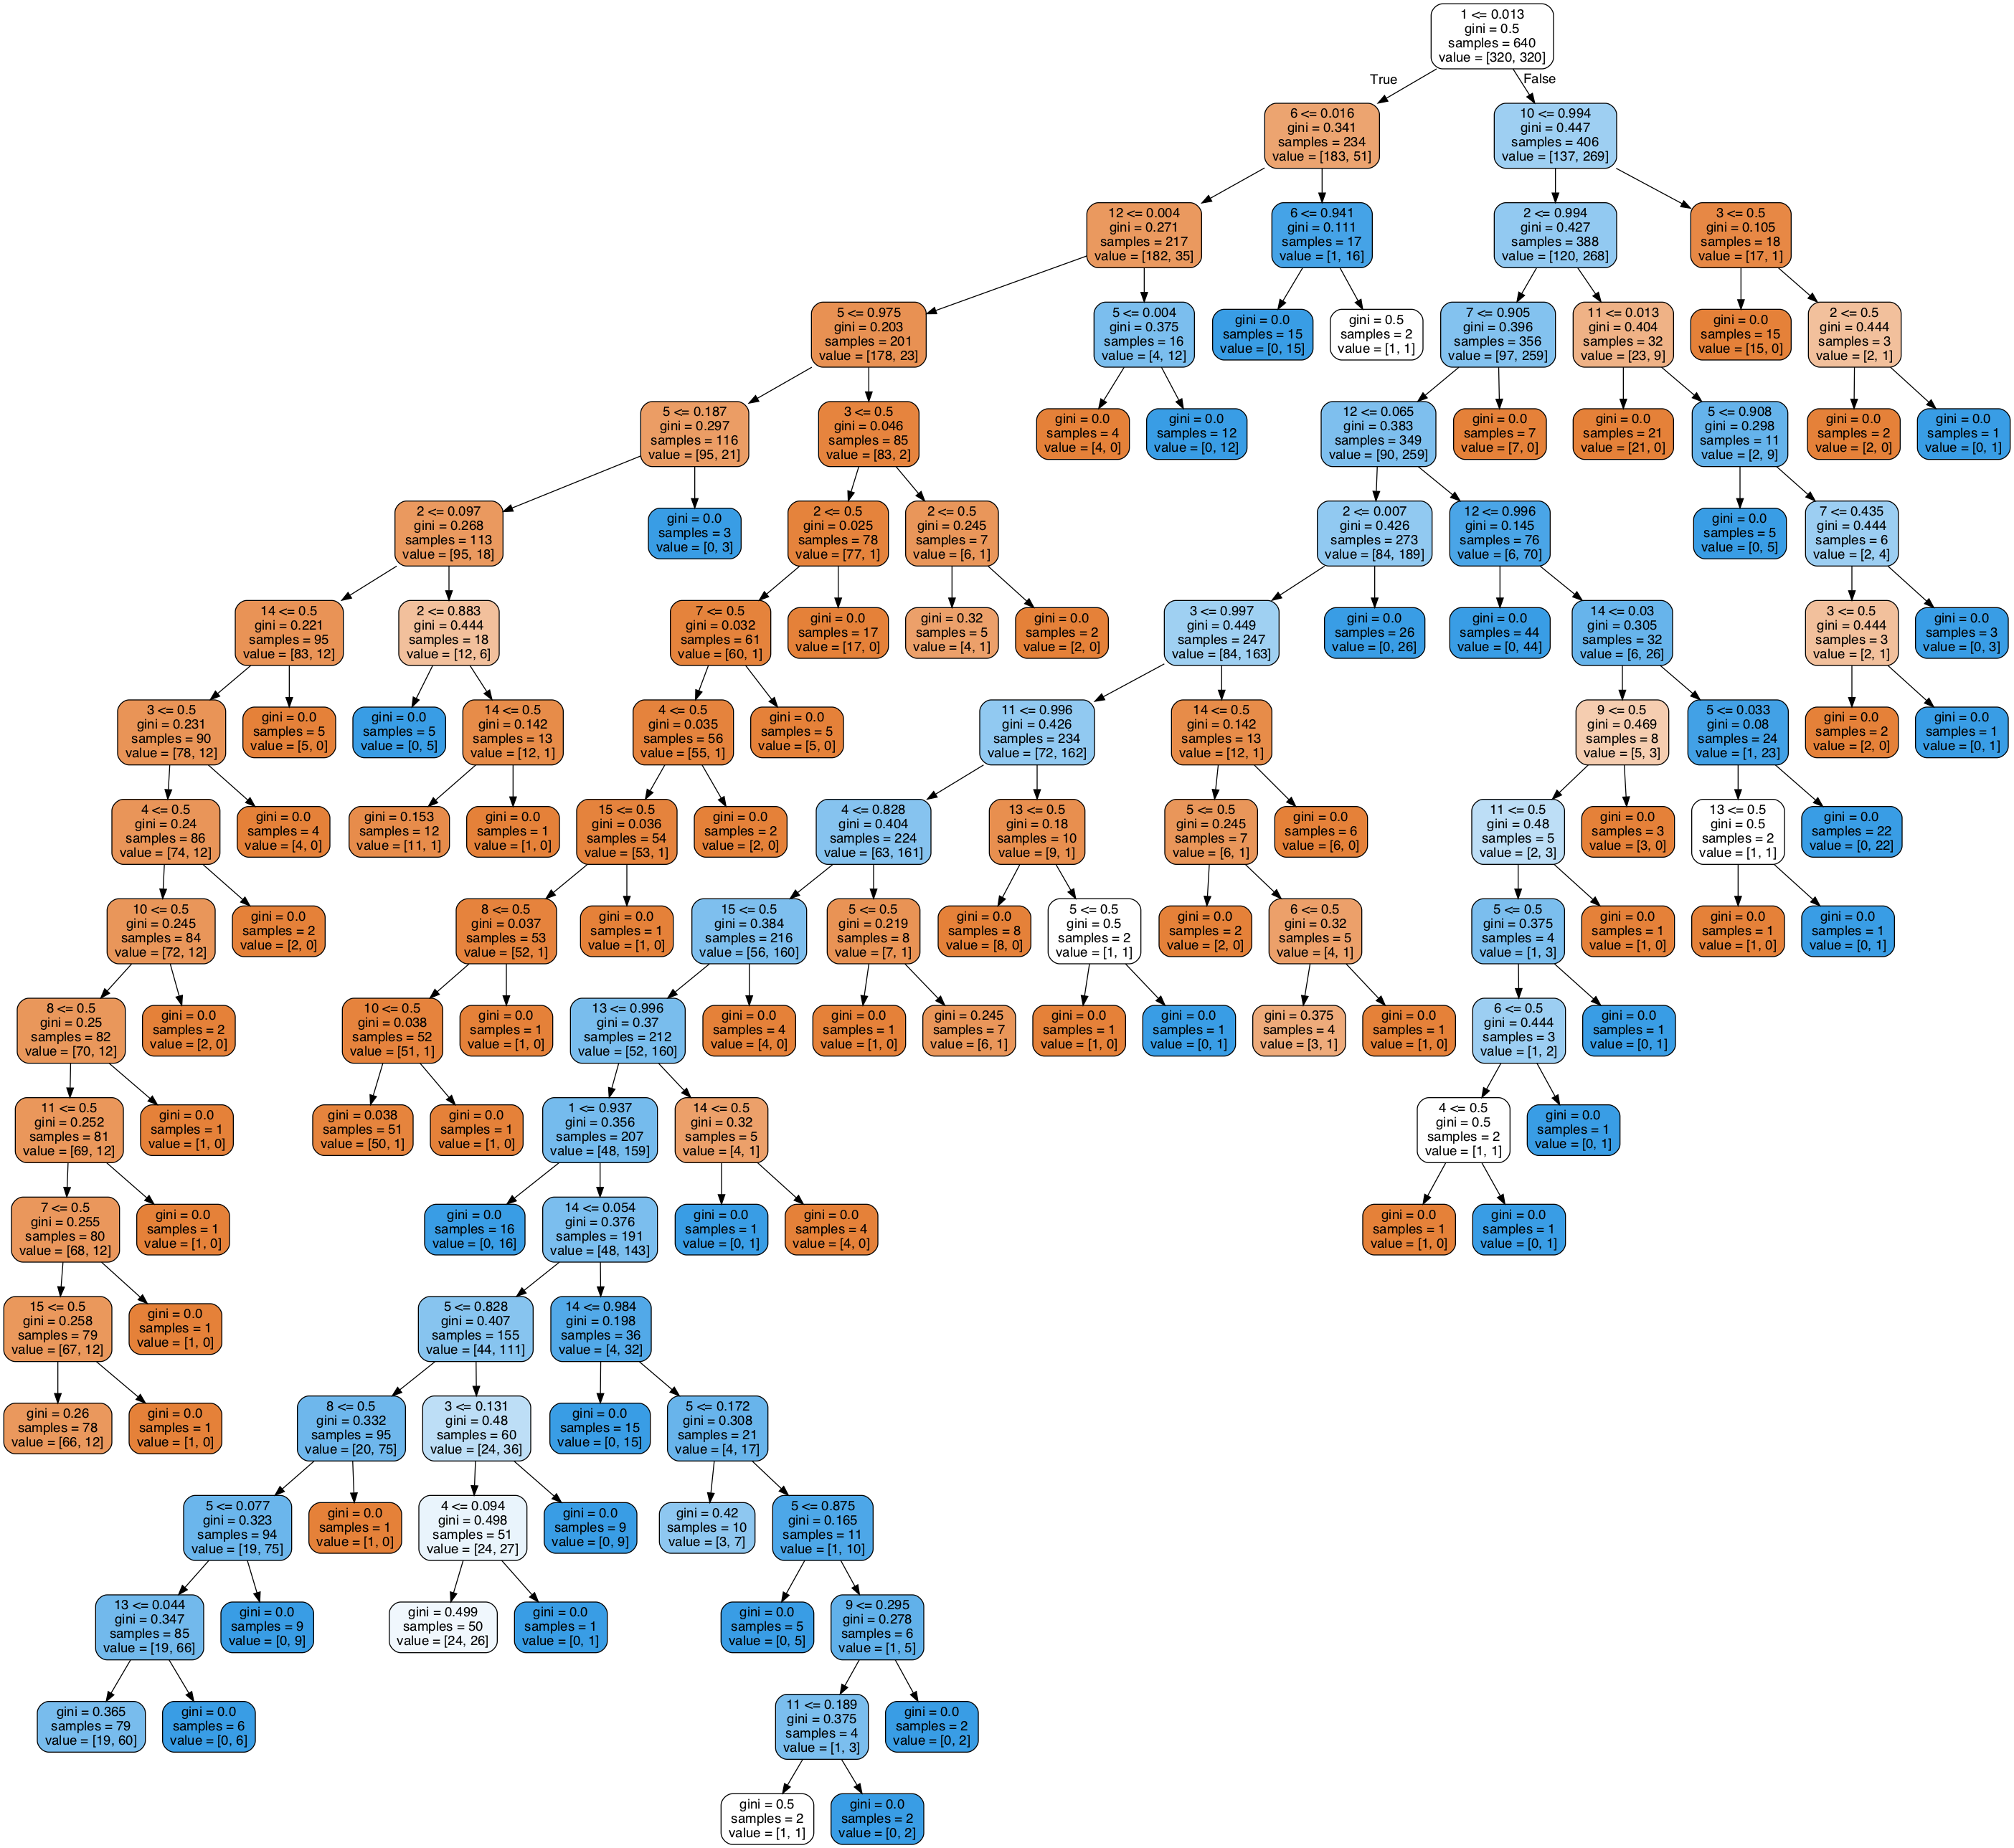

In [28]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

# Grid Search for tree

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [30]:
dt_clf = DecisionTreeClassifier()

dt_cv_score = cross_val_score(dt_clf, X_resampled, y_resampled, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 84.54%


In [31]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6,7,8,9,10],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [32]:
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_resampled, y_resampled)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [33]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 82.24%
Mean Test Score: 72.08%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

# Putting new parameters back in tree

In [34]:
#when using the tree from the grid search

In [35]:
dtree = DecisionTreeClassifier(criterion='gini',
 max_depth=None,
 min_samples_leaf=1,
 min_samples_split=2)
dtree.fit(X_resampled,y_resampled)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

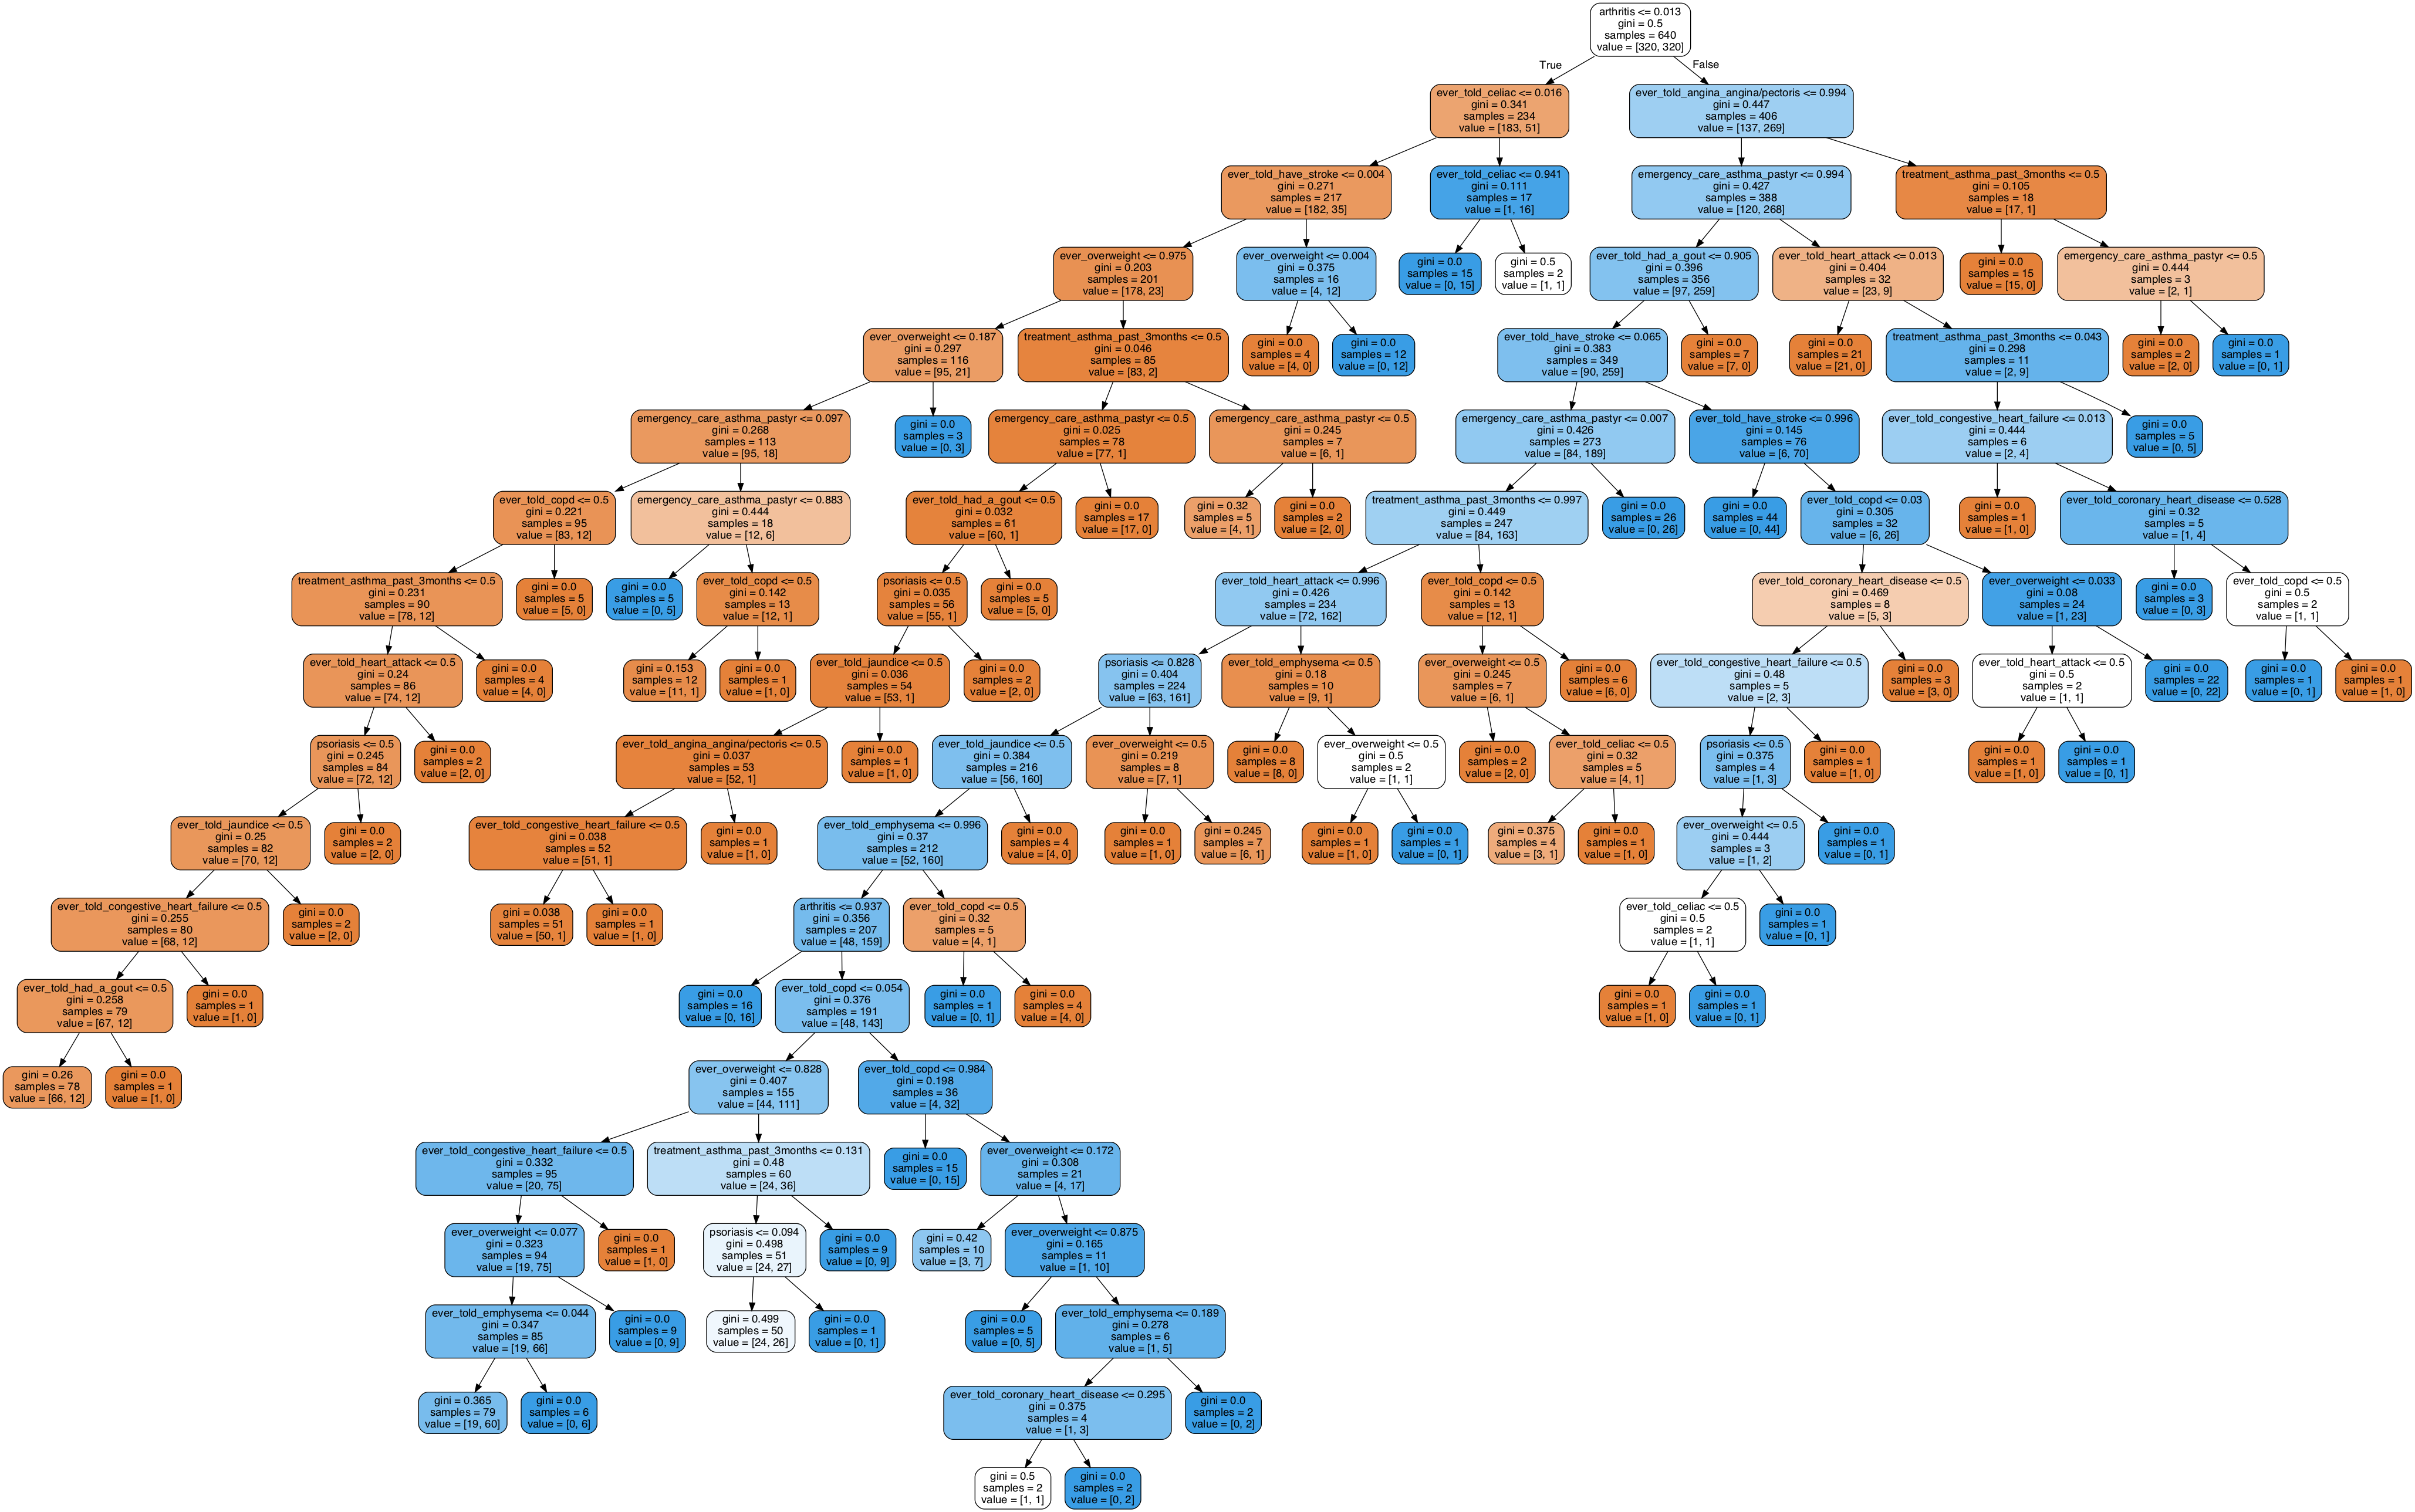

In [36]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
features = list(X.columns)
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [37]:
predictions = dtree.predict(X_test)

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.89      0.74      0.81       133
         1.0       0.21      0.43      0.28        21

    accuracy                           0.70       154
   macro avg       0.55      0.59      0.55       154
weighted avg       0.80      0.70      0.74       154



In [39]:
metrics.accuracy_score(y_test, predictions)


0.7012987012987013

In [40]:
dtree = DecisionTreeClassifier(criterion='gini',
 max_depth=5,
 min_samples_leaf=1,
 min_samples_split=2)
dtree.fit(X_resampled,y_resampled)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
#testing predictions

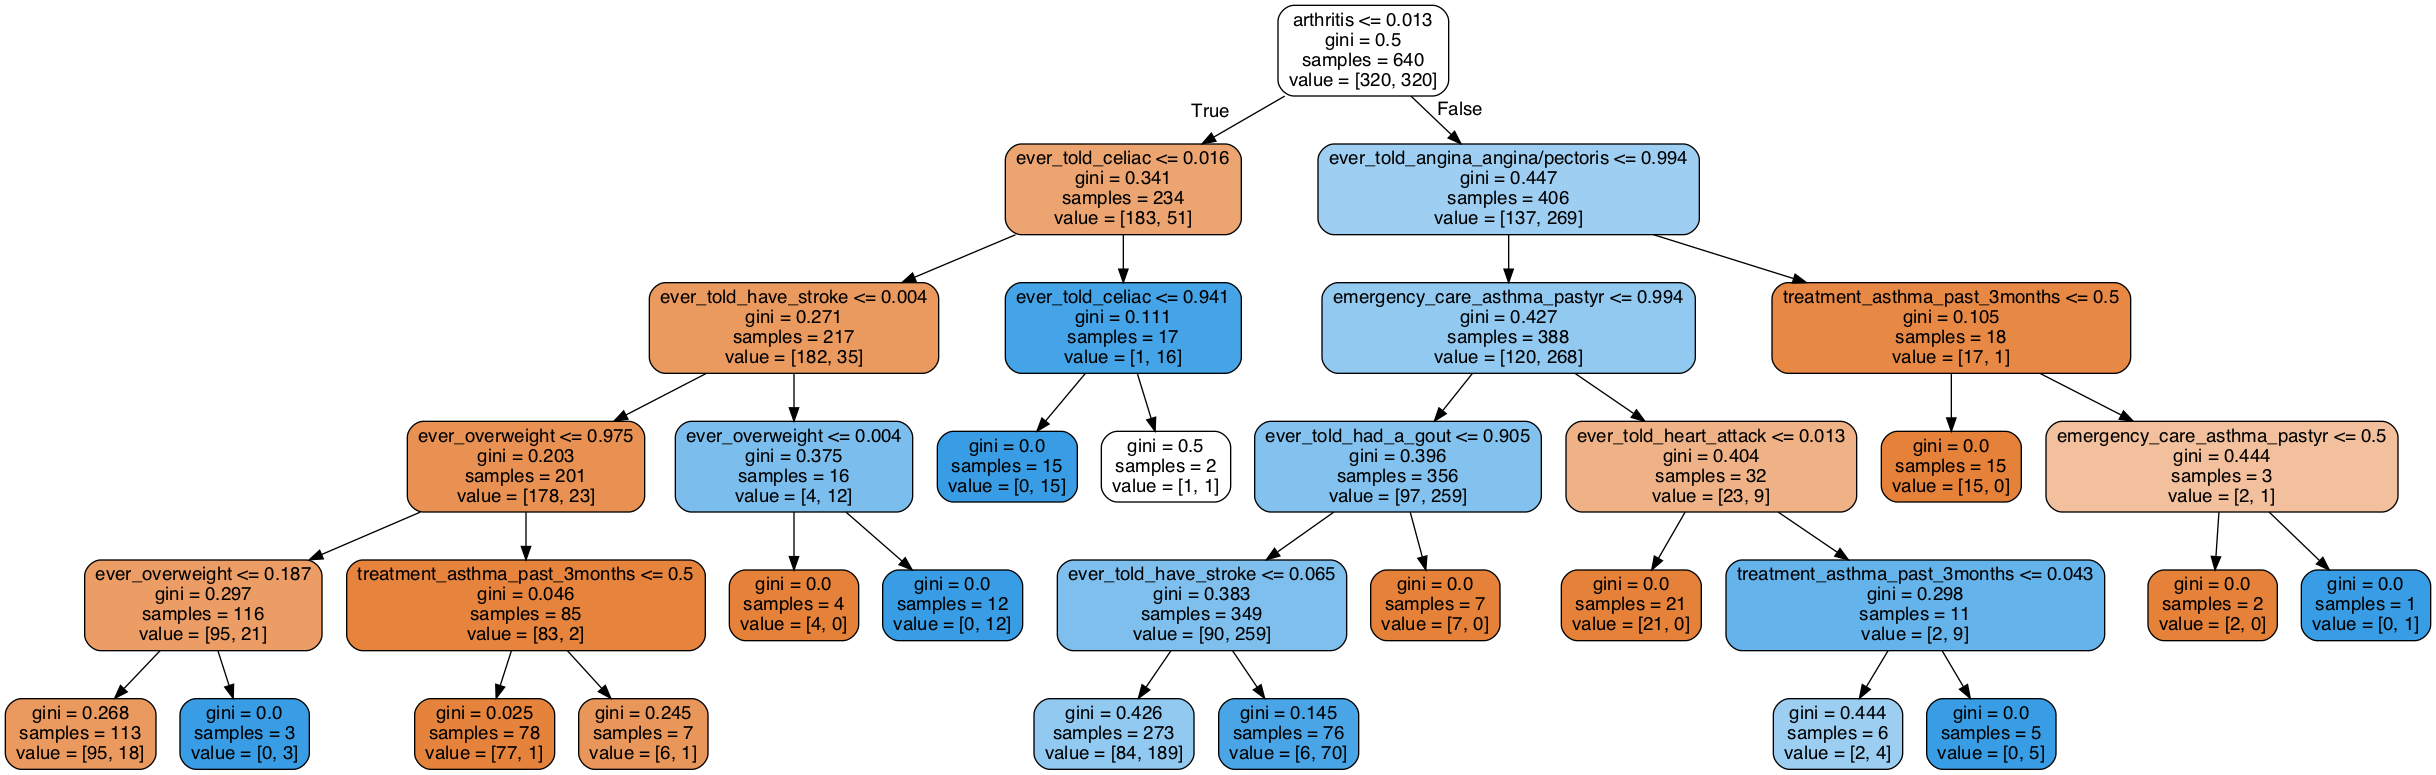

In [42]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
features = list(X.columns)
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [43]:
predictions = dtree.predict(X_test)

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.89      0.66      0.76       133
         1.0       0.18      0.48      0.26        21

    accuracy                           0.64       154
   macro avg       0.54      0.57      0.51       154
weighted avg       0.79      0.64      0.69       154



In [45]:
metrics.accuracy_score(y_test, predictions)


0.6363636363636364

In [46]:
dt_clf = DecisionTreeClassifier()
dt_cv_score = cross_val_score(dt_clf, X_resampled, y_resampled, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)
print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 84.23%


# Random Forest

In [47]:
data_train = X_resampled
data_test = X_test
target_train = y_resampled
target_test = y_test

In [48]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [49]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(data_train, target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
tree_clf.feature_importances_

array([0.        , 0.37859194, 0.08404512, 0.00889475, 0.        ,
       0.08105432, 0.12940071, 0.04876043, 0.        , 0.        ,
       0.08953611, 0.06234578, 0.11737085, 0.        , 0.        ,
       0.        ])

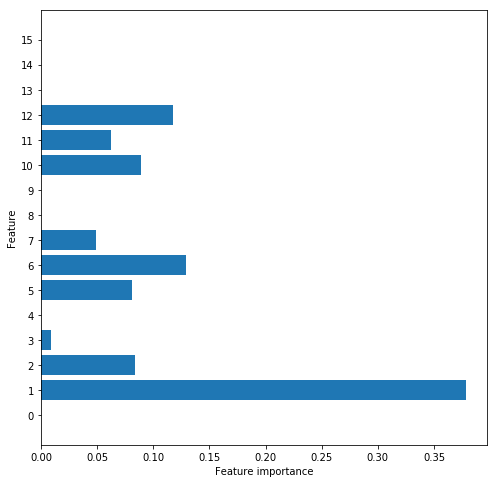

In [51]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [52]:
pred = tree_clf.predict(data_test)

In [53]:
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

[[88 45]
 [11 10]]
              precision    recall  f1-score   support

         0.0       0.89      0.66      0.76       133
         1.0       0.18      0.48      0.26        21

    accuracy                           0.64       154
   macro avg       0.54      0.57      0.51       154
weighted avg       0.79      0.64      0.69       154



In [54]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))


Testing Accuracy for Decision Tree Classifier: 63.64%


# Grid search random forest

In [55]:
dt_clf = DecisionTreeClassifier()

dt_cv_score = cross_val_score(dt_clf, X_resampled, y_resampled, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 84.07%


In [56]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6,7,8,9,10],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [57]:
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_resampled, y_resampled)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [58]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 82.24%
Mean Test Score: 70.78%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

# XGBoost

In [69]:
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [60]:
#w = answers1.drop('cancer',axis=1)
#could have also done answers1.set_index('SEQN') instead of dropping
#X = w.drop('SEQN',axis=1)
#y = answers1['cancer']

In [61]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [62]:
#X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [63]:
#y_resampled = pd.DataFrame(y_resampled)

In [64]:
#X_resampled = pd.DataFrame(X_resampled, columns= X_test.columns)

In [65]:
clf = XGBClassifier()

In [66]:
# Instantiate XGBClassifier
clf.fit(X_resampled, y_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [67]:
# Predict on training and test sets
training_preds = clf.predict(X_resampled)
test_preds = clf.predict(X_test)

ValueError: feature_names mismatch: ['0 ', '1 ', '2 ', '3 ', '4 ', '5 ', '6 ', '7 ', '8 ', '9 ', '10', '11', '12', '13', '14', '15'] ['asthma', 'arthritis', 'emergency_care_asthma_pastyr', 'treatment_asthma_past_3months', 'psoriasis', 'ever_overweight', 'ever_told_celiac', 'ever_told_had_a_gout', 'ever_told_congestive_heart_failure', 'ever_told_coronary_heart_disease', 'ever_told_angina_angina/pectoris', 'ever_told_heart_attack', 'ever_told_have_stroke', 'ever_told_emphysema', 'ever_told_copd', 'ever_told_jaundice']
expected 3 , 11, 4 , 6 , 9 , 8 , 10, 2 , 5 , 1 , 13, 15, 7 , 14, 12, 0  in input data
training data did not have the following fields: arthritis, ever_overweight, ever_told_copd, emergency_care_asthma_pastyr, asthma, psoriasis, ever_told_celiac, ever_told_coronary_heart_disease, ever_told_congestive_heart_failure, ever_told_heart_attack, ever_told_emphysema, ever_told_have_stroke, treatment_asthma_past_3months, ever_told_angina_angina/pectoris, ever_told_jaundice, ever_told_had_a_gout

In [68]:

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_resampled, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

NameError: name 'test_preds' is not defined

# XGBoost from medium article
#https://towardsdatascience.com/a-beginners-guide-to-xgboost-87f5d4c30ed7

In [70]:
from sklearn import datasets
import xgboost as xgb

In [79]:
w = answers1.drop('cancer',axis=1)
#could have also done answers1.set_index('SEQN') instead of dropping
X = w.drop('SEQN',axis=1)
y = answers1['cancer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
y_resampled = pd.DataFrame(y_resampled)
X_resampled = pd.DataFrame(X_resampled, columns = X_test.columns)

In [80]:
D_train = xgb.DMatrix(X_resampled, label=y_resampled)
D_test = xgb.DMatrix(X_test, label=y_test)

In [81]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20  # The number of training iterations

In [82]:
model = xgb.train(param, D_train, steps)


In [83]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.5632107023411371
Recall = 0.6015037593984962
Accuracy = 0.7272727272727273


In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, (best_preds > 0.5))
print(cm)

[[103  30]
 [ 12   9]]


In [85]:

classification_report(y_test, (best_preds > 0.5))


'              precision    recall  f1-score   support\n\n         0.0       0.90      0.77      0.83       133\n         1.0       0.23      0.43      0.30        21\n\n    accuracy                           0.73       154\n   macro avg       0.56      0.60      0.57       154\nweighted avg       0.80      0.73      0.76       154\n'

# SVM

In [ ]:
#for data without the continuous stuff - only has the yes or no answers

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split  
from time import time

In [87]:
from sklearn.svm import SVC  
tic = time()
svclassifier = SVC(kernel='rbf', C=1000)  
svclassifier.fit(X_resampled, y_resampled) 
y_pred = svclassifier.predict(X_test)
toc = time()
print("run time is {} seconds".format(toc-tic))

run time is 0.017531871795654297 seconds


In [89]:
#these are the predictions for each thing in the training set
np.y_pred

AttributeError: module 'numpy' has no attribute 'y_pred'

In [90]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_test, y_pred)))

[[121  12]
 [ 17   4]]
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89       133
         1.0       0.25      0.19      0.22        21

    accuracy                           0.81       154
   macro avg       0.56      0.55      0.55       154
weighted avg       0.79      0.81      0.80       154

The accuracy score is 0.8116883116883117


# KNN

In [ ]:
#w = answers1.drop('cancer',axis=1)
#could have also done answers1.set_index('SEQN') instead of dropping
#X = w.drop('SEQN',axis=1)
#y = answers1['cancer']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
#X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
#y_resampled = pd.DataFrame(y_resampled)
#X_resampled = pd.DataFrame(X_resampled, columns = X_test.columns)

In [96]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_resampled)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X_resampled.columns)
scaled_df_train.head()

,asthma,arthritis,emergency_care_asthma_pastyr,treatment_asthma_past_3months,psoriasis,ever_overweight,ever_told_celiac,ever_told_had_a_gout,ever_told_congestive_heart_failure,ever_told_coronary_heart_disease,ever_told_angina_angina/pectoris,ever_told_heart_attack,ever_told_have_stroke,ever_told_emphysema,ever_told_copd,ever_told_jaundice
0,0.0,0.811938,-0.419614,-0.316311,-0.247552,1.026319,-0.175853,-0.203817,-0.276466,-0.286762,-0.263601,-0.351598,-0.366166,-0.322609,2.044709,-0.147508
1,0.0,-1.280027,-0.419614,-0.316311,-0.247552,-1.019584,-0.175853,-0.203817,-0.276466,-0.286762,-0.263601,-0.351598,-0.366166,-0.322609,-0.524456,-0.147508
2,0.0,-1.280027,-0.419614,-0.316311,-0.247552,-1.019584,-0.175853,-0.203817,-0.276466,-0.286762,-0.263601,-0.351598,-0.366166,-0.322609,2.044709,-0.147508
3,0.0,0.811938,-0.419614,3.520290,-0.247552,1.026319,-0.175853,5.213978,-0.276466,-0.286762,-0.263601,-0.351598,-0.366166,-0.322609,-0.524456,-0.147508
4,0.0,0.811938,-0.419614,-0.316311,-0.247552,-1.019584,-0.175853,5.213978,4.126237,3.843678,4.353831,-0.351598,-0.366166,3.332881,2.044709,-0.147508


In [97]:
scaled_data_train = scaler.fit_transform(X_resampled)
scaled_data_test = scaler.transform(X_test)

In [98]:
scaler = StandardScaler()

In [99]:
#next fits a KNN model

In [100]:

# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_data_train, y_resampled)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

In [101]:
#next evaluates the model

In [102]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


In [103]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.26666666666666666
Recall Score: 0.19047619047619047
Accuracy Score: 0.8181818181818182
F1 Score: 0.2222222222222222
